# **Entrega 2**

Importamos los paquetes necesarios

In [ ]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import scipy as stast
import sklearn as skl         
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importamos los datasets

In [ ]:
datosContactos = pd.read_csv("Data/DatasetContactos.csv")
datosTransacciones = pd.read_csv("Data/DatasetTrxs.csv")

## **Parte 1: EDA**

Exploracion los datasets

In [ ]:
datosContactos.head()

In [ ]:
datosTransacciones.head()

In [ ]:
datosContactos.describe()

In [ ]:
datosTransacciones.describe()

Las variables con las que trabajaremos en los distintos dataset seran:

Dataset Transacciones Clientes

*   CUSTID: Identificador del cliente
*   BALANCE: Monto del saldo disponible para realizar compras
*   BALANCE_FREQUENCY: Frecuencia de actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
*   PURCHASES: Importe de las compras realizadas
*   ONE_OFF_PURCHASES: Monto máximo de una compra realizada de una sola vez
*   INSTALLMENTS_PURCHASES: Cantidad de compras hechas en cuotas
*   CASH_ADVANCE: Cantidad de retiros en efectivo
*   PURCHASES_FREQUENCY: Frecuencia de las compras (1 = frecuentemente, 0 = no frecuentemente)
*   ONE_OFF_PURCHASES_FREQUENCY: Compras frecuentes son realizadas deuna sola vez (1 = frecuentemente, 0 = no frecuentemente)
*   PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia de compras en cuotas (1 = frecuentemente, 0 = no frecuentemente) 
*   CASH_ADVANCE_FREQUENCY: Frecuencia de retiros en efectivo (1 = frecuentemente, 0 = no frecuentemente)
*   CASH_ADVANCE_TRX: Cantidad de transacciones de retiro en efectivo
*   PURCHASES_TRX: Cantidad de transacciones
*   CREDIT_LIMIT: Limite de crédito
*   PAYMENTS: Cantidad de pagos efectuados por el usuario
*   MINIMUM_PAYMENTS: Cantidad de pagos mínimos hechos por el usuario
*   PRC_FULL_PAYMENT: Porcentaje de pagos totales hechos por el usuario
*   TENURE: Tenencia de la tarjeta de crédito (meses)

Dataset Contactos

*   CUSTID: Identificador del cliente
*   PHONE: Teléfono de contacto
*   CONTACTS: Cantidad de llamados que recibió en los últimos 60 días





Estudiamos la distribucion de las variables del dataset Transacciones


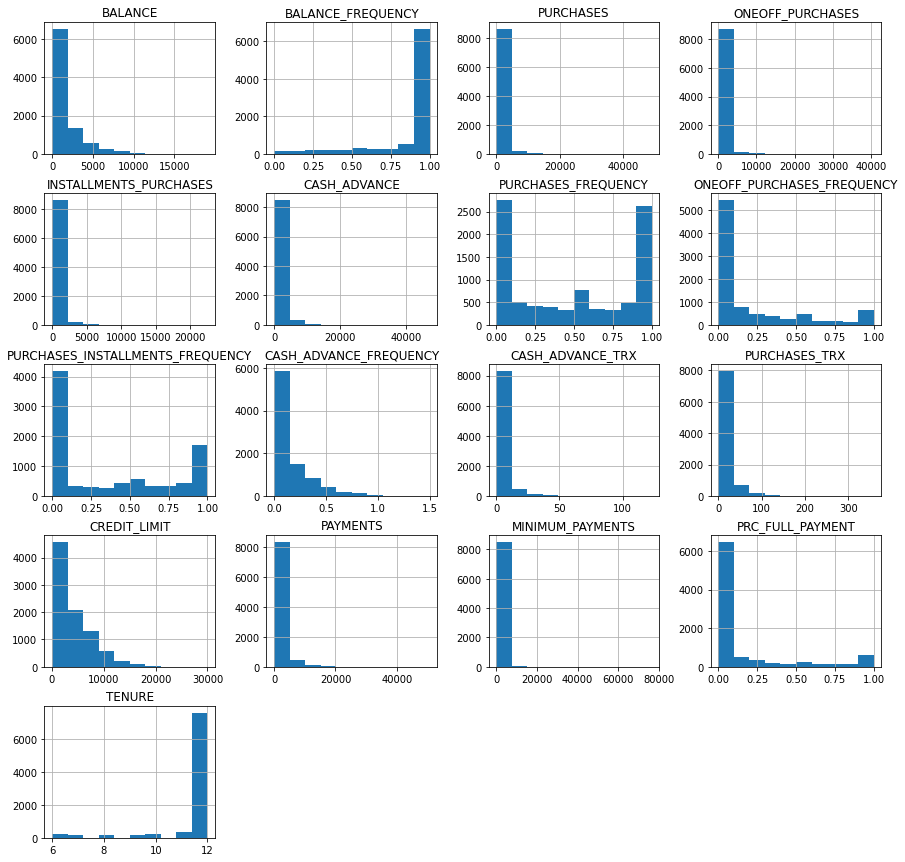

In [ ]:
datosTransacciones.hist(figsize = (15,15));

Estudiamos los valores maximos y minimos de cada variable

In [ ]:
(min(datosTransacciones['BALANCE']), max(datosTransacciones['BALANCE']))

(0.0, 19043.13856)

In [ ]:
(min(datosTransacciones['BALANCE_FREQUENCY']), max(datosTransacciones['BALANCE_FREQUENCY']))

(0.0, 1.0)

In [ ]:
(min(datosTransacciones['PURCHASES']), max(datosTransacciones['PURCHASES']))

(0.0, 49039.57)

In [ ]:
(min(datosTransacciones['ONEOFF_PURCHASES']), max(datosTransacciones['ONEOFF_PURCHASES']))

(0.0, 40761.25)

In [ ]:
(min(datosTransacciones['INSTALLMENTS_PURCHASES']), max(datosTransacciones['INSTALLMENTS_PURCHASES']))

(0.0, 22500.0)

In [ ]:
(min(datosTransacciones['CASH_ADVANCE']), max(datosTransacciones['CASH_ADVANCE']))

(0.0, 47137.21176)

In [ ]:
(min(datosTransacciones['PURCHASES_FREQUENCY']), max(datosTransacciones['PURCHASES_FREQUENCY']))

(0.0, 1.0)

In [ ]:
(min(datosTransacciones['ONEOFF_PURCHASES_FREQUENCY']), max(datosTransacciones['ONEOFF_PURCHASES_FREQUENCY']))

(0.0, 1.0)

In [ ]:
(min(datosTransacciones['PURCHASES_INSTALLMENTS_FREQUENCY']), max(datosTransacciones['PURCHASES_INSTALLMENTS_FREQUENCY']))

(0.0, 1.0)

In [ ]:
(min(datosTransacciones['CASH_ADVANCE_FREQUENCY']), max(datosTransacciones['CASH_ADVANCE_FREQUENCY']))

(0.0, 1.5)

In [ ]:
(min(datosTransacciones['CASH_ADVANCE_TRX']), max(datosTransacciones['CASH_ADVANCE_TRX']))

(0, 123)

In [ ]:
(min(datosTransacciones['PURCHASES_TRX']), max(datosTransacciones['PURCHASES_TRX']))

(0, 358)

In [ ]:
(min(datosTransacciones['CREDIT_LIMIT']), max(datosTransacciones['CREDIT_LIMIT']))

(50.0, 30000.0)

In [ ]:
(min(datosTransacciones['PAYMENTS']), max(datosTransacciones['PAYMENTS']))

(0.0, 50721.48336)

In [ ]:
(min(datosTransacciones['MINIMUM_PAYMENTS']), max(datosTransacciones['MINIMUM_PAYMENTS']))

(0.019163, 76406.20752)

In [ ]:
(min(datosTransacciones['PRC_FULL_PAYMENT']), max(datosTransacciones['PRC_FULL_PAYMENT']))

(0.0, 1.0)

In [ ]:
(min(datosTransacciones['TENURE']), max(datosTransacciones['TENURE']))

(6, 12)

Estudiamos la media y el promedio de las variables

In [ ]:
datosTransacciones["BALANCE"].mean()

1564.4748276781038

In [ ]:
datosTransacciones["BALANCE_FREQUENCY"].mean()

0.8772707255865991

In [ ]:
datosTransacciones["ONEOFF_PURCHASES"].mean()

592.437370949722

In [ ]:
datosTransacciones["INSTALLMENTS_PURCHASES"].mean()

411.06764469273713

In [ ]:
datosTransacciones["CASH_ADVANCE"].mean()

978.8711124654749

In [ ]:
datosTransacciones["PURCHASES_FREQUENCY"].mean()

0.4903505483798885

In [ ]:
datosTransacciones["ONEOFF_PURCHASES_FREQUENCY"].mean()

0.20245768357542138

In [ ]:
datosTransacciones["PURCHASES_INSTALLMENTS_FREQUENCY"].mean()

0.3644373415642452

In [ ]:
datosTransacciones["CASH_ADVANCE_FREQUENCY"].mean()

0.1351442003351972

In [ ]:
datosTransacciones["CASH_ADVANCE_TRX"].mean()

3.2488268156424582

In [ ]:
datosTransacciones["PURCHASES_TRX"].mean()

14.709832402234637

In [ ]:
datosTransacciones["CREDIT_LIMIT"].mean()

4494.449450364621

In [ ]:
datosTransacciones["PAYMENTS"].mean()

1733.1438520248041

In [ ]:
datosTransacciones["MINIMUM_PAYMENTS"].mean()

864.2065423050816

In [ ]:
datosTransacciones["PRC_FULL_PAYMENT"].mean()

0.1537146484916212

In [ ]:
datosTransacciones["TENURE"].mean()

11.51731843575419

Vemos la distribucion de los datos

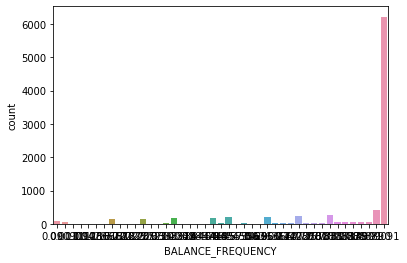

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="BALANCE_FREQUENCY")
display()

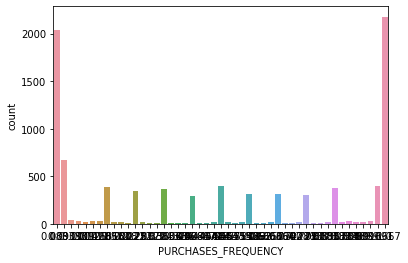

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PURCHASES_FREQUENCY")
display()

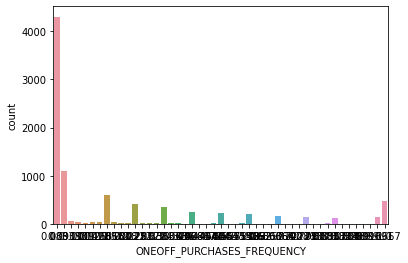

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="ONEOFF_PURCHASES_FREQUENCY")
display()

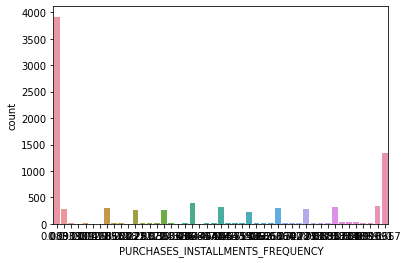

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PURCHASES_INSTALLMENTS_FREQUENCY")
display()

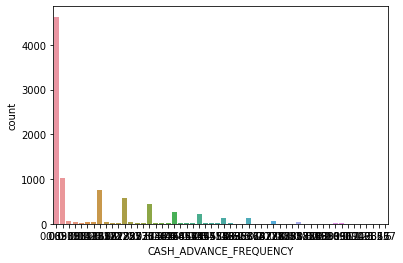

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="CASH_ADVANCE_FREQUENCY")
display()

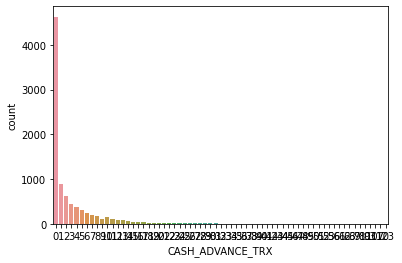

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="CASH_ADVANCE_TRX")
display()

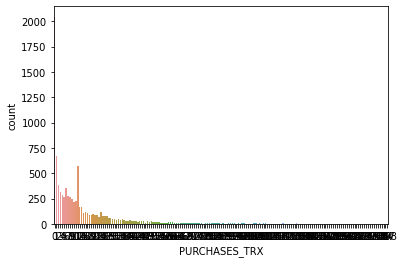

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PURCHASES_TRX")
display()

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="CREDIT_LIMIT")
display()

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PAYMENTS")
display()

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="MINIMUM_PAYMENTS")
display()

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="PRC_FULL_PAYMENT")
display()

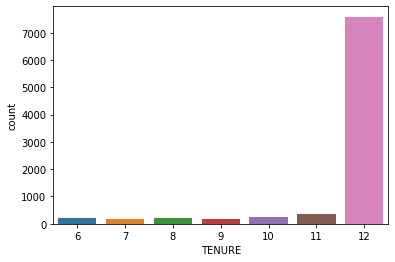

In [ ]:
plt.figure()
sns.countplot(data = datosTransacciones, x="TENURE")
display()

Podemos ver el rango de la tenencia de la tarjeta con la que estamos trabajando, la cual va desde 6 a 12 meses, siendo la mayor parte de los datos de 12 meses

Box Plot de las variables:

Asi de esta forma podremos validar la inexistencia de outliers y observar mejor las distribuciones de las variables.

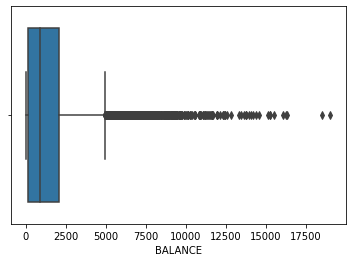

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['BALANCE'])
display()

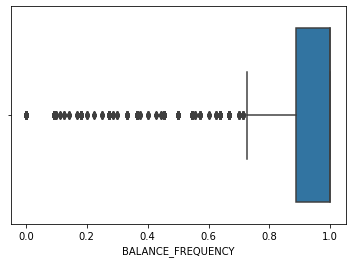

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['BALANCE_FREQUENCY'])
display()

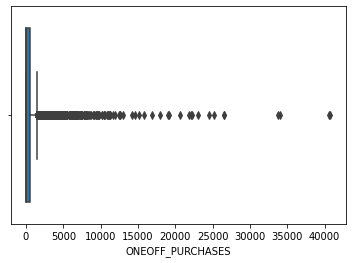

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['ONEOFF_PURCHASES'])
display()

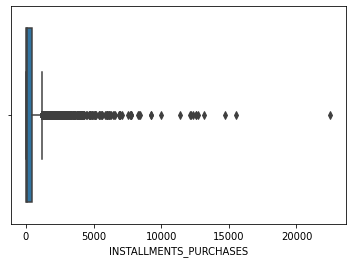

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['INSTALLMENTS_PURCHASES'])
display()

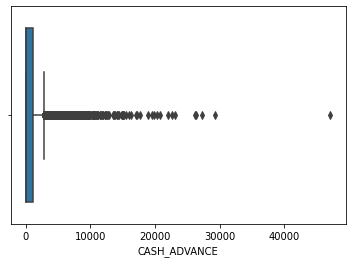

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CASH_ADVANCE'])
display()

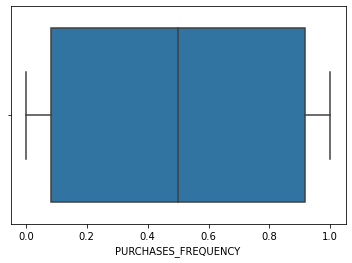

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PURCHASES_FREQUENCY'])
display()

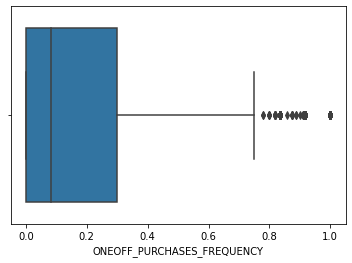

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['ONEOFF_PURCHASES_FREQUENCY'])
display()

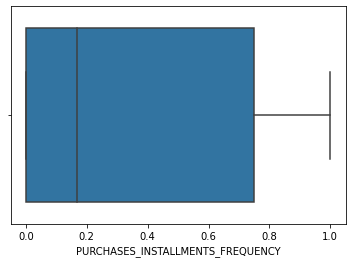

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PURCHASES_INSTALLMENTS_FREQUENCY'])
display()

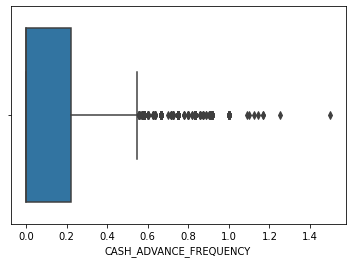

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CASH_ADVANCE_FREQUENCY'])
display()

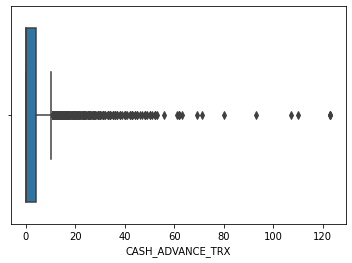

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CASH_ADVANCE_TRX'])
display()

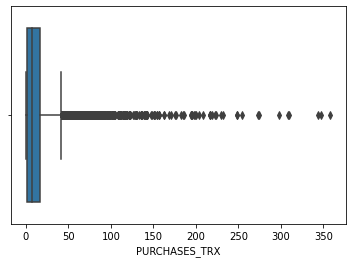

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PURCHASES_TRX'])
display()

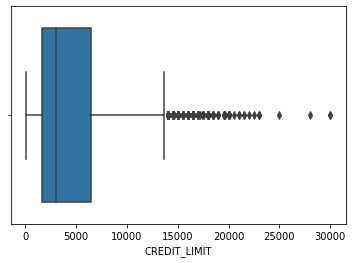

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['CREDIT_LIMIT'])
display()

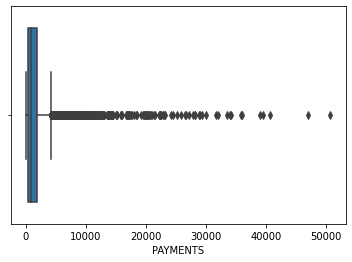

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PAYMENTS'])
display()

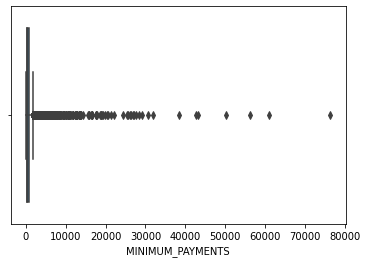

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['MINIMUM_PAYMENTS'])
display()

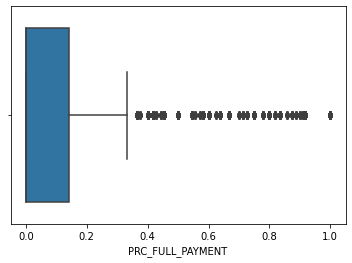

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['PRC_FULL_PAYMENT'])
display()

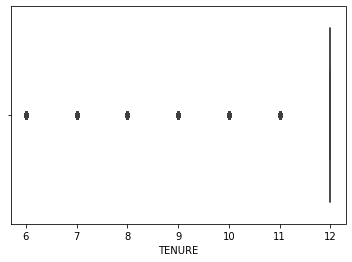

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x = datosTransacciones['TENURE'])
display()

Podemos ver que las distribuciones de las variables son las siguientes:


* BALANCE: 
* BALANCE_FREQUENCY: 
* ONE_OFF_PURCHASES: 
* INSTALLMENTS_PURCHASES: 
* CASH_ADVANCE: 
* PURCHASES_FREQUENCY: 
* ONE_OFF_PURCHASES_FREQUENCY:
* PURCHASES_INSTALLMENTS_FREQUENCY:
* CASH_ADVANCE_FREQUENCY: 
* CASH_ADVANCE_TRX: 
* PURCHASES_TRX: 
* CREDIT_LIMIT: 
* PAYMENTS: 
* MINIMUM_PAYMENTS: 
* PRC_FULL_PAYMENT: 
* TENURE: valores entre 6 y 12



Representación gráfica de la correlación entre variables a traves de heatmap del paquete Seaborn

In [ ]:
datosTransacciones.figure(figsize = (17,6))
sns.heatmap(datosTransacciones.corr(), annot = True, cmap="BuPu")
plt.show()

# **Parte 2: Limpieza Datos**

Eliminamos los duplicados

In [ ]:
datosContactos.drop_duplicates(inplace= True )

In [ ]:
datosTransacciones.drop_duplicates(inplace= True )

# **Parte 3: Algoritmo k-means**

# **Parte 4: DBSCAN**

# **Parte 5: Ward**

# **Parte 6: Cuestionarios**

# **Parte 7: Conclusiones**